# Introduction

In [ ]:
"""
What? From decision trees to bagging to random forest

VanderPlas, Jake. Python data science handbook: Essential tools for working with data. "O'Reilly Media, Inc.", 2016.
https://github.com/jakevdp/PythonDataScienceHandbook
"""

# Import modules

In [19]:
from sklearn.datasets import make_blobs
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

# Helper function

In [12]:
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    # fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, clim=(y.min(), y.max()),
                           zorder=1)
    ax.set(xlim=xlim, ylim=ylim)

# Create synthetic dataset

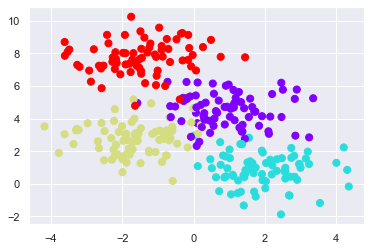

In [8]:
X, y = make_blobs(n_samples=300, centers=4, random_state=0, cluster_std=1.0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow')

In [ ]:
"""
A simple decision tree built on this data will iteratively split the data along one or the other axis according 
to some quantitative criterion, and at each level assign the label of the new region according to a majority vote
of points within it.
"""

# Decision trees

In [10]:
tree = DecisionTreeClassifier().fit(X, y)

<ipython-input-12-e3296bcf2a6f>:17: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


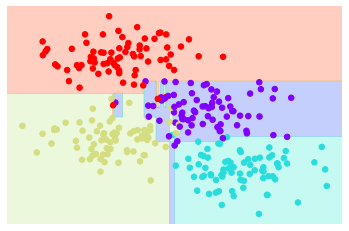

In [15]:
visualize_classifier(DecisionTreeClassifier(), X, y)

In [ ]:
"""
Notice that as the depth increases, we tend to get very strangely shaped classification regions; for example, 
at a depth of five, there is a tall and skinny purple region between the yellow and blue regions. It’s clear 
that this is less a result of the true, intrinsic data distribution, and more a result of the particular 
sampling or noise properties of the data. That is, this decision tree, even at only five levels deep, is 
clearly OVERFITTING our data.
"""

# Bagging

In [ ]:
"""
This notion that multiple overfitting estimators can be combined to reduce the effect of this overfitting is 
what underlies an ensemble method called BAGGING. Bagging makes use of an ensemble of
parallel estimators, each of which overfits the data, and averages the results to find a better classification. 
An ensemble of randomized decision trees is known as a random forest.
"""

<ipython-input-12-e3296bcf2a6f>:17: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


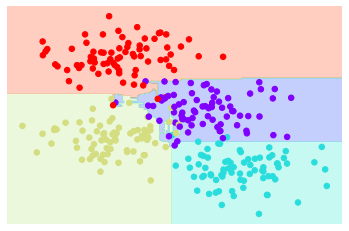

In [18]:
tree = DecisionTreeClassifier()
bag = BaggingClassifier(tree, n_estimators=100, max_samples=0.8,
                        random_state=1)
visualize_classifier(bag, X, y)

# Ranfom forest

In [ ]:
"""
In this example, we have randomized the data by fitting each estimator with a ran‐ dom subset of 80% of the 
training points. In practice, decision trees are more effectively randomized when some stochasticity is 
injected in how the splits are chosen; this way, all the data contributes to the fit each time, but the results 
of the fit still have the desired randomness. For example, when determining which feature to split on, the 
randomized tree might select from among the top several features. You can read more technical details about 
these randomization strategies in the Scikit-Learn docu‐ mentation and references within.

In Scikit-Learn, such an optimized ensemble of randomized decision trees is imple‐ mented in the 
RandomForestClassifier estimator, which takes care of all the ran‐ domization automatically. All you need to 
do is select a number of estimators, and it will very quickly (in parallel, if desired) fit the ensemble of trees
"""

<ipython-input-12-e3296bcf2a6f>:17: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


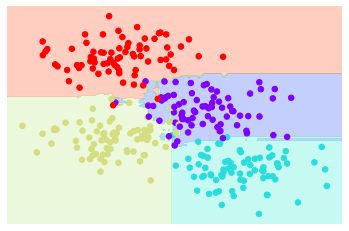

In [20]:
model = RandomForestClassifier(n_estimators=100, random_state=0)
visualize_classifier(model, X, y);

In [ ]:
"""
We see that by averaging over 100 randomly perturbed models, we end up with an overall model that is much 
closer to our intuition about how the parameter space should be split.
"""